# IMBALANCED DATA IN MACHINE LEARNING 
by khalidi hassan

### What is Data imbalance

Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally.
For example, you may have a 2-class (binary) classification problem with 100 instances (rows). A total of 80 instances are labeled with Class-1 and the remaining 20 instances are labeled with Class-2.

### Why data imbalance 

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.
Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

### what are we balancing

we balance the imbalanced data based on the minority and majority classes

### Methods used to balance data

1.	Change the performance metric (Precision:,Recall:,F1: Score, are the best ones)
       
2.	Change the algorithm (try a variety of algorithms)
3.	Oversample minority class (Oversampling can be defined as adding more copies of the minority class. )
4.	Undersample majority class (removing some observations of the majority class. )
5.	Generate synthetic samples (SMOTE AND ADSYN)
    -imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.
    

### example using Oversample minority class

In [18]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [19]:
data=pd.read_csv('train.csv')
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [20]:
cleanup_nums = {"continue_drop":{"continue":1,"drop":0},
                "gender":{"F":0,"M":1},
                "caste":{"BC":0,"SC":1,"OC":2,"ST":3},
                "guardian":{"mother":0,"father":1,"other":2,"mixed":3}
               }

data.replace(cleanup_nums, inplace=True)

data.internet = data.internet.astype(int)
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,1,0,0.666,0.468,0.666,7,6,2,1,305,354,86.0,1986.0
1,1,s16986,1,0,0.172,0.420,0.172,8,10,0,0,331,516,15.0,1996.0
2,1,s00147,0,0,0.212,0.601,0.212,1,4,0,0,311,209,14.0,1976.0
3,1,s08104,0,3,0.434,0.611,0.434,2,5,1,1,364,147,28.0,1911.0
4,1,s11132,0,1,0.283,0.478,0.283,1,10,0,1,394,122,15.0,1889.0


In [21]:
finaldata=data.drop(['student_id','establishment_year','total_students','total_toilets'],axis="columns")
finaldata.head()

,continue_drop,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id
0,1,1,0,0.666,0.468,0.666,7,6,2,1,305
1,1,1,0,0.172,0.420,0.172,8,10,0,0,331
2,1,0,0,0.212,0.601,0.212,1,4,0,0,311
3,1,0,3,0.434,0.611,0.434,2,5,1,1,364
4,1,0,1,0.283,0.478,0.283,1,10,0,1,394


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D2C8FE2FD0>,
      dtype=object)

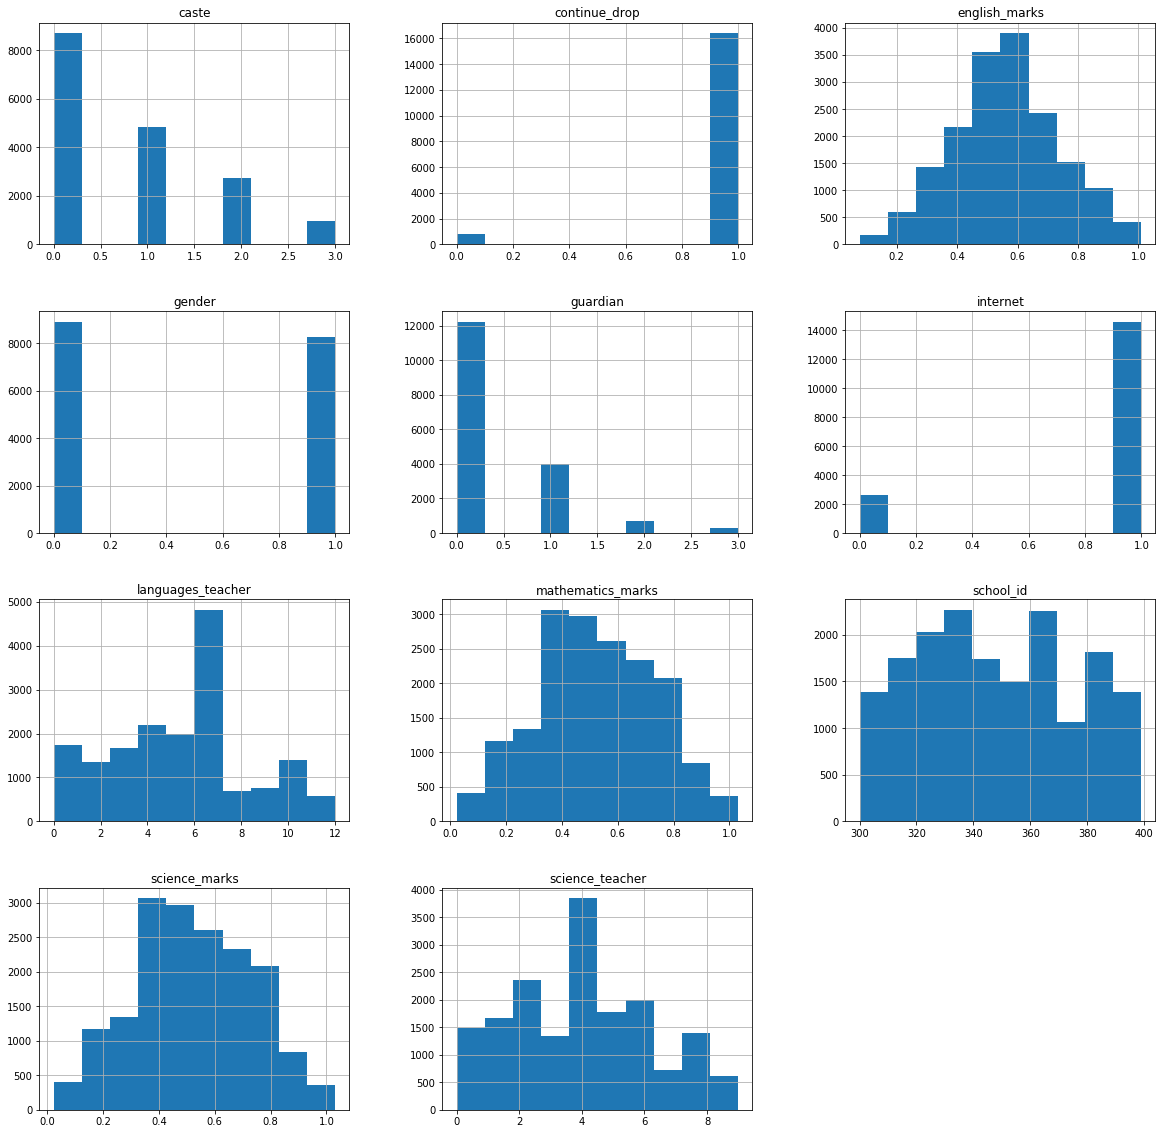

In [22]:
finaldata.hist(figsize=(20,20))

### data after imbalanced handle using 
## Oversample minority class

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000D2C9355438>,
      dtype=object)

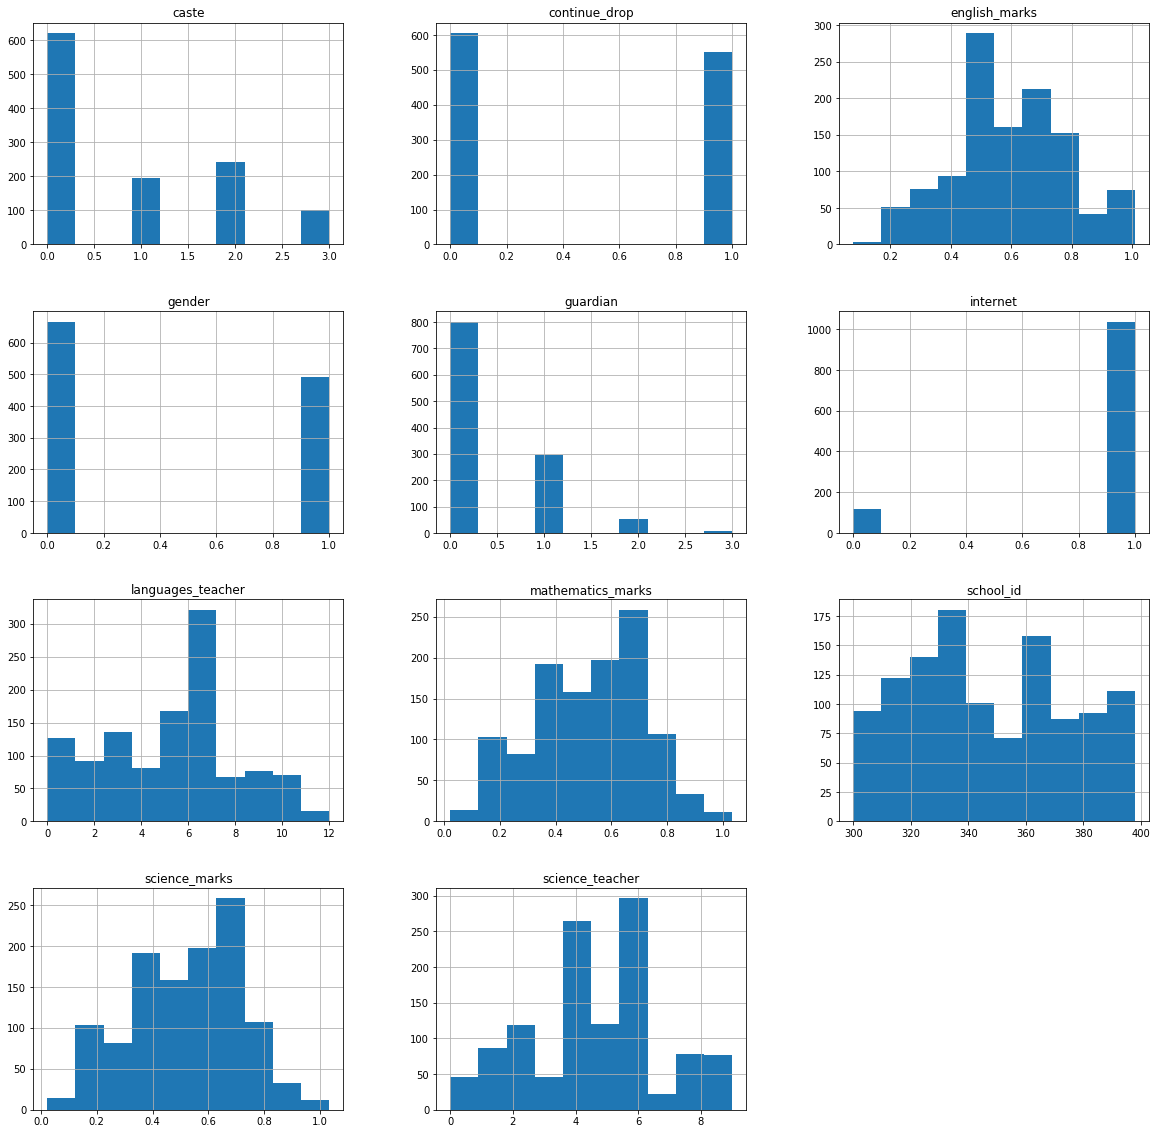

In [23]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

y = finaldata.continue_drop
X = finaldata.drop('continue_drop', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

X = pd.concat([X_train, y_train], axis=1)

drop=X[X.continue_drop==0]
continued=X[X.continue_drop==1]
sampled_drop= resample(finaldata,
                          replace=True, 
                          n_samples=len(drop), 
                          random_state=27) 

sampled_data= pd.concat([drop, sampled_drop])

sampled_data.hist(figsize=(20,20))